# Interest on research topic over time

This is a simple tutorial on how to use __[Europe PMC](https://europepmc.org/)__ database to show the popularity of a research topic over time. 

In [19]:
# Reading the required libraries
library(europepmc)
library(cowplot)
library(tidyverse)
#library(plotly)

The code is very simple, you just have to nest your query and the period inside the ``epmc_hits_trend()``. You've probably seen similar plots on papers, which visualize the number of publications including a given keyword over a period of time, but they tend to use the raw number of publications, which is not accurate since the total number of publications is also increasing each year. The graphs bellow are adjusted for the total number of publications, which provides a more accurate measure of research interest. 

In [31]:
# Deep Learning query 
dl_trend <- europepmc::epmc_hits_trend(query = 'Diabetes',
                                       period = 2009:2019)
dl_trend

year,all_hits,query_hits
<int>,<dbl>,<dbl>
2009,792666,43486
2010,850694,50122
2011,904131,56470
2012,945219,63531
2013,1002489,73162
2014,1053740,79763
2015,1094010,85821
2016,1112807,89233
2017,1131098,93655


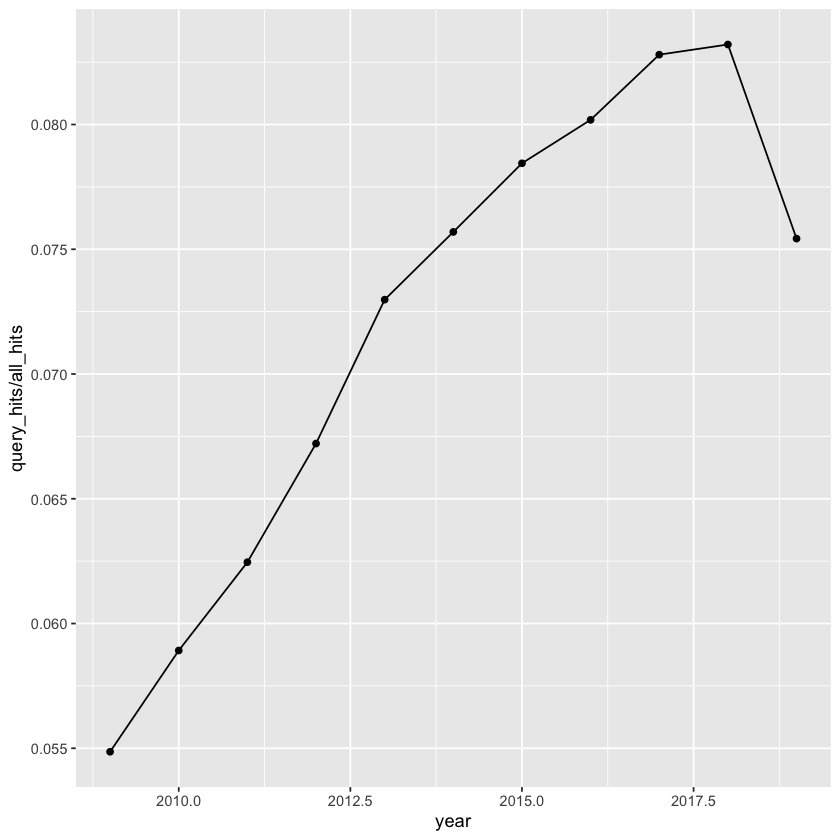

In [32]:
# Standard plot

dl_trend %>% 
  ggplot(aes(year, query_hits / all_hits)) + 
  geom_point() + 
  geom_line()

In [33]:
# Better plot
dl_plot <- dl_trend %>%
  ggplot(aes(x = factor(year), y = (query_hits / all_hits))) +
  geom_col(fill = "#56B4E9", width = 0.6, alpha = 0.9) +
  scale_y_continuous(expand = c(0, 0)) +
  theme_minimal_hgrid(12) +
  labs(x = "Year", y = "Proportion of all published articles") +
  ggtitle("Interest in Deep Learning research over the past 10 years") 